# Kelompok AI - IF 44-04


*   Arsy Bagja Mugia Gunawan - 1301204018
*   Muhammad Fadil Maulana Akbar - 1301204297
*   Muhammad Sayyid Aqilah - 1301204047


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_excel("bengkel.xlsx")
dataset

Saving bengkel.xlsx to bengkel.xlsx


,id,servis,harga
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


# Linguistic Servis:


*   Buruk = 1 - 30
*   Sedang = 50 - 60
*   Bagus = 80 - 100

# Linguistic Harga:

*   Murah = 1 - 3
*   Sedang = 5 - 6
*   Mahal = 8 - 10

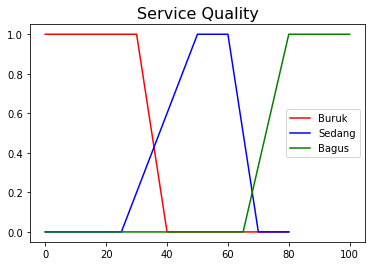

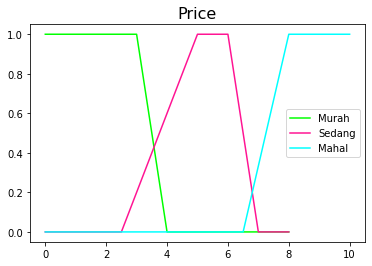

In [3]:
def service():
  x1 = [0, 30, 40, 80]
  y1 = [1, 1, 0, 0]
  
  x2 = [0, 25 ,50, 60, 70, 80]
  y2 = [0, 0, 1, 1, 0, 0]

  x3 = [0, 65, 80, 100]
  y3 = [0, 0, 1, 1]

  plt.title("Service Quality", fontsize=16)

  plt.plot(x1, y1, label="Buruk", color="red")
  plt.plot(x2, y2, label="Sedang", color="blue")
  plt.plot(x3, y3, label="Bagus", color="green")

  plt.legend()
  plt.show()

def price():
  x1 = [0, 3, 4, 8]
  y1 = [1, 1, 0, 0]
  
  x2 = [0, 2.5 ,5, 6, 7, 8]
  y2 = [0, 0, 1, 1, 0, 0]

  x3 = [0, 6.5, 8, 10]
  y3 = [0, 0, 1, 1]

  plt.title("Price", fontsize=16)

  plt.plot(x1, y1, label="Murah", color="lime")
  plt.plot(x2, y2, label="Sedang", color="deeppink")
  plt.plot(x3, y3, label="Mahal", color="aqua")

  plt.legend()
  plt.show()

service()
print("")
price()

In [4]:
# Membership Service
def serv_member_buruk(data):
  if data <= 30:
    return 1
  elif data > 40:
    return 0
  elif data > 30 and data <= 40:
    return (40 - data) / (40 - 30)

def serv_member_sedang(data):
  if data <= 25 or data >= 70:
    return 0
  elif data >= 50 and data <= 60:
    return 1
  elif data >= 25 and data < 50:
    return (data - 25) / (50 - 25)
  elif data > 60 and data < 70:
    return (70 - data) / (70 - 60)

def serv_member_bagus(data):
  if data <= 65:
    return 0
  elif data >= 80:
    return 1
  elif data > 65 and data <= 80:
    return (data - 65) / (80 - 65)

# Membership Price
def price_member_murah(data):
  if data <= 3:
    return 1
  elif data > 4:
    return 0
  elif data > 3 and data <= 4:
    return (4 - data) / (4 - 3)

def price_member_sedang(data):
  if data <= 2.5 or data >= 7:
    return 0
  elif data >= 5 and data <= 6:
    return 1
  elif data >= 2.5 and data < 5:
    return (data - 2.5) / (5 - 2.5)
  elif data > 6 and data < 7:
    return (7 - data) / (7 - 6)

def price_member_mahal(data):
  if data <= 6.5:
    return 0
  elif data >= 8:
    return 1
  elif data > 6.5 and data <= 8:
    return (data - 6.5) / (8 - 6.5)

In [5]:
def fuzzy_serv(data):
  service = {
      'buruk' : serv_member_buruk(data),
      'sedang' : serv_member_sedang(data),
      'bagus' : serv_member_bagus(data)
  }
  return service

def fuzzy_price(data):
  price = {
      'murah' : price_member_murah(data),
      'sedang' : price_member_sedang(data),
      'mahal' : price_member_mahal(data)
  }
  return price

# Fuzzy Rules

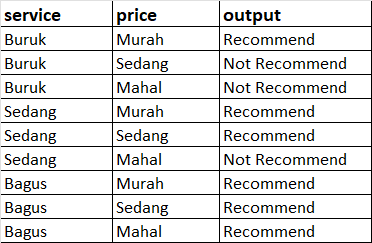

In [6]:
def inference(serv_value, price_value):
  rules = {
      'Not Recommend' : [],
      'Recommend' : []
  }

  result = {
      'Not Recommend' : [],
      'Recommend' : []
  }

  rules["Not Recommend"].append(min(serv_value['buruk'], price_value['sedang']))
  rules["Not Recommend"].append(min(serv_value['buruk'], price_value['mahal']))
  rules["Not Recommend"].append(min(serv_value['sedang'], price_value['mahal']))

  rules["Recommend"].append(min(serv_value['buruk'], price_value['murah']))
  rules["Recommend"].append(min(serv_value['sedang'], price_value['murah']))
  rules["Recommend"].append(min(serv_value['sedang'], price_value['sedang']))
  rules["Recommend"].append(min(serv_value['bagus'], price_value['murah']))
  rules["Recommend"].append(min(serv_value['bagus'], price_value['sedang']))
  rules["Recommend"].append(min(serv_value['bagus'], price_value['mahal']))

  result["Not Recommend"].append(max(rules["Not Recommend"]))
  result["Recommend"].append(max(rules["Recommend"]))

  return result

# Deffuzification - Takagi Sugeno Method

*   Not Recommend = 50
*   Recommend = 100

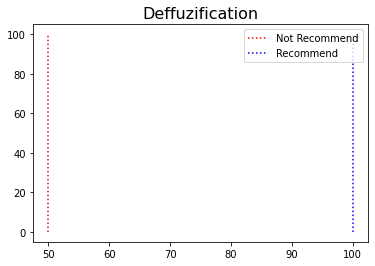

In [7]:
def sugeno():
  plt.title("Deffuzification", fontsize=16)
  plt.vlines(50, 0, 100, linestyles="dotted", colors ="r", label="Not Recommend")
  plt.vlines(100, 0, 100, linestyles="dotted", colors ="b", label="Recommend")
  plt.legend()
  plt.show()

sugeno()

In [8]:
def deffuzification(rules):
  rec = 100
  not_rec = 50

  for i in rules.values():
    for j in range(len(i)):
      result = ((rules['Not Recommend'][j] * not_rec) +  (rules['Recommend'][j] * rec)) / (rules['Not Recommend'][j] + rules['Recommend'][j])
  return result

In [9]:
data = dataset.to_numpy()

result = []
for i in range(len(data)):
  inf = inference(fuzzy_serv(data[i, 1]),fuzzy_price(data[i, 2]))
  deffuzy = deffuzification(inf)
  temp = [i + 1, deffuzy]
  result.append(temp)


result.sort(key =  lambda x: x[1], reverse=True)

best10 = result[:10]

best = pd.DataFrame(best10, columns=['ID', 'Score'])
best.to_excel('peringkat.xlsx', index=False)

peringkat = pd.read_excel("peringkat.xlsx")
peringkat

,ID,Score
0,2,100
1,3,100
2,4,100
3,9,100
4,13,100
5,15,100
6,16,100
7,21,100
8,22,100
9,24,100
